# SNP classification 대회 요약

## 이번 대회에서 높은 성적을 거두지는 못했음.

정리:  
먼저, 단일 모델로, XGBoost, SVM, KNN 등의 다양한 classifier를 grid search 하면서 많은 시간을 보냈다.  
이렇게 하였을 때, 내가 찾은 모델 중 가장 성능 좋은 단일 모델은 SVM 이였다.(이 이상으로는 스코어가 아무리해도 오르지 않았음)  
- 앙상블도 시도를 해보았지만, SVM과 같거나 오히려 점수가 떨어짐.

아래가 SVM에 grid search 적용해서 찾던 과정

In [121]:
### SVM
train_loss = [0]
best_test = [0]
best_description = ["Nothing"]
A = "C"
B = "gamma"
C = "degree"
D = "kernel"

c = 0
for i in np.arange(0.1,3,0.1):
    
    for j in np.arange(0.01,0.2,0.01):
        
        for k in range(1,7):
            
            for q in ['linear', 'poly', 'rbf', 'sigmoid']:
                
                model = svm.SVC(C = i, gamma=j, degree=k, kernel=q, probability=True) #############
                model.fit(train_x_train, train_y_train)
                model_pred_train = model.predict(train_x_train)
                model_pred_test = model.predict(train_x_test)
                model_f1_train = f1_score(train_y_train, model_pred_train, average='macro')
                model_f1_test = f1_score(train_y_test, model_pred_test, average='macro')
                print(f"{A} is {i}, {B} is {j}, {C} is {k}, {D} is {q} ",'F1 (model train): ', "%.2f" % (model_f1_train))
                print(f"{A} is {i}, {B} is {j}, {C} is {k}, {D} is {q} ",'F1 (model test): ', "%.2f" % (model_f1_test))
                print("\n")
                print("before if",model_f1_test)
                if(best_test[c]<=model_f1_test):
                    print("after if",model_f1_test)
                    best_description.append(f"\nbest setting: n_estimator {i}, loss {j}, learning_rate {k}, min_samples_split {q}, {model_f1_test}")
                    best_test.append(model_f1_test)
                    train_loss.append(model_f1_train)
                    c += 1

C is 0.1, gamma is 0.01, degree is 1, kernel is linear  F1 (model train):  0.98
C is 0.1, gamma is 0.01, degree is 1, kernel is linear  F1 (model test):  0.91


before if 0.9110047846889953
after if 0.9110047846889953
C is 0.1, gamma is 0.01, degree is 1, kernel is poly  F1 (model train):  0.39
C is 0.1, gamma is 0.01, degree is 1, kernel is poly  F1 (model test):  0.35


before if 0.35416666666666663
C is 0.1, gamma is 0.01, degree is 1, kernel is rbf  F1 (model train):  0.39
C is 0.1, gamma is 0.01, degree is 1, kernel is rbf  F1 (model test):  0.35


before if 0.35416666666666663
C is 0.1, gamma is 0.01, degree is 1, kernel is sigmoid  F1 (model train):  0.39
C is 0.1, gamma is 0.01, degree is 1, kernel is sigmoid  F1 (model test):  0.35


before if 0.35416666666666663
C is 0.1, gamma is 0.01, degree is 2, kernel is linear  F1 (model train):  0.98
C is 0.1, gamma is 0.01, degree is 2, kernel is linear  F1 (model test):  0.91


before if 0.9110047846889953
after if 0.9110047846889953

이렇게 단일 모델을 확정한 후에, 모델보다는 데이터쪽을 봐야겠다 생각하였다.

데이터쪽으로는, 각 SNP01부터 모든 feature에 대해 class들의 frequency를 보고, 개수가 4보다 낮은 경우를 outlier로 생각하여 모두 삭제하고 하였는데도, 점수에는 큰 차이가 없었다.  
이렇게 데이터 부분에서도 크게 처리한 것은 없었다.  


마지막으로, 예측분포를 보고자, SVM으로 classification한 결과를 tsne를 통해 시각화를 하였더니,

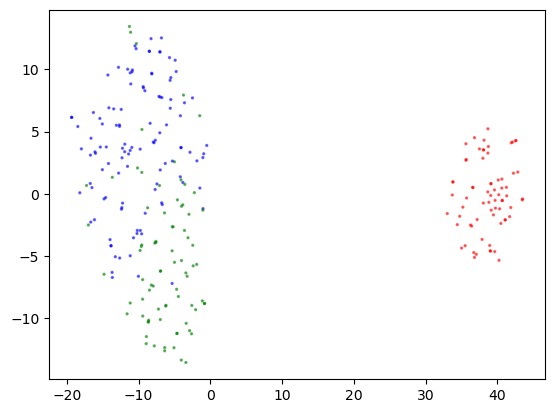

In [118]:
plt.scatter(tsne_train['component 0'], tsne_train['component 1'], c = colors, s = 2, alpha = 0.5)

이렇게 결과가 나왔는데, 결과에 나온 것 처럼 Class A(빨간색)의 경우는 매우 잘 classification이 잘 되었음을 알 수 있었다.  
그래서, A의 경우 결과는 따로 빼두고, B,C(파란색, 초록색)의 경우에 대한 binary classification 문제로 바꾸어서 model training을 진행했다.

binary classification에서 사용한 모델로는 XGBoost, SVM, LGBMClassifier 모델을 각각 학습해서 각각 모델에서 나온 확률값을 앙상블하는 식으로 최종 예측을 하였다.

결론:  
사실 이진 classification 문제로 바꾼 후에도, 가장 좋은 성능을 내었던 SVM과 점수 차이가 없이 같았다.  
하지만, 이는 Public score 기준이였고, private에서는 저렇게 이진 분류 문제로 학습한 모델이 더 좋지 않을까 하여, 해당 파일로 제출을 하였다.  
이렇게 해서 100위권 이내로 점수를 기록할 수 있었다.